In [1]:

import pandas as pd
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('Resources/US_French_Chardonnays.csv')
df

,Unnamed: 0,ID,alcohol,category,country,description,designation,index,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,0,NaN,13.0,White,France,Just a hint of pear peel rises from the nose. ...,Secret de notre Terroir Chard'MMXV,1017.0,28.0,92,Alsace,Alsace,NaN,Domaine Charles Baur 2015 Secret de notre Terr...,https://www.winemag.com/buying-guide/domaine-c...,Chardonnay,2015,Domaine Charles Baur
1,1,NaN,13.5,White,France,"Named after the vineyard, this wood-aged wine ...",Eparcieux,3741.0,23.0,90,Beaujolais,Beaujolais Blanc,NaN,Domaine Chasselay 2017 Eparcieux (Beaujolais ...,https://www.winemag.com/buying-guide/domaine-c...,Chardonnay,2017,Domaine Chasselay
2,2,NaN,12.5,White,France,"Vines in the first flush of youth, are behind ...",Les Chardonnerets,3742.0,18.0,88,Beaujolais,Beaujolais Blanc,NaN,Domaine Franck Besson 2017 Les Chardonnerets ...,https://www.winemag.com/buying-guide/domaine-f...,Chardonnay,2017,Domaine Franck Besson
3,3,NaN,13.5,White,France,"Grown on a mix of granite and chalk soils, thi...",Collonge,3743.0,19.0,88,Beaujolais,Beaujolais Blanc,NaN,Domaines Chermette 2016 Collonge (Beaujolais ...,https://www.winemag.com/buying-guide/domaines-...,Chardonnay,2016,Domaines Chermette
4,4,NaN,13.0,White,France,"This warm, ripe wine has attractive yellow-fru...",NaN,3744.0,18.0,88,Beaujolais,Beaujolais Blanc,NaN,Gilles Gelin 2017 Beaujolais Blanc,https://www.winemag.com/buying-guide/gilles-ge...,Chardonnay,2017,Gilles Gelin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13688,14364,248214.0,14.4,White,US,"Front-loaded with fruit, this extraordinarily ...",Rosella's Vineyard,NaN,44.0,90,California,Central Coast,Santa Lucia Highlands,Testarossa 2005 Rosella's Vineyard Chardonnay ...,https://www.winemag.com/buying-guide/testaross...,Chardonnay,2005,Testarossa
13689,14365,248312.0,14.5,White,US,This is a great expression of what winemaker R...,Camelot Highlands Estate,NaN,25.0,91,California,Central Coast,Santa Maria Valley,Kendall-Jackson 2005 Camelot Highlands Estate ...,https://www.winemag.com/buying-guide/kendall-j...,Chardonnay,2005,Kendall-Jackson
13690,14366,248330.0,14.5,White,US,What a great Chard. Just delicious in palate-f...,Seco Highlands Estate,NaN,30.0,92,California,Central Coast,Arroyo Seco,Kendall-Jackson 2005 Seco Highlands Estate Cha...,https://www.winemag.com/buying-guide/kendall-j...,Chardonnay,2005,Kendall-Jackson
13691,14367,248342.0,15.2,White,US,"This is a new winery for me, but one to watch....",Reserve,NaN,29.0,92,California,Central Coast,Santa Barbara County,Addamo 2005 Reserve Chardonnay (Santa Barbara ...,https://www.winemag.com/buying-guide/addamo-20...,Chardonnay,2005,Addamo


In [3]:
df = df.drop(['Unnamed: 0', 'ID', 'index', 'category', 'description', 'designation', 'subsubregion', 'title', 'url', 'varietal', 'winery'], axis=1)
df.head()


,alcohol,country,price,rating,region,subregion,vintage
0,13.0,France,28.0,92,Alsace,Alsace,2015
1,13.5,France,23.0,90,Beaujolais,Beaujolais Blanc,2017
2,12.5,France,18.0,88,Beaujolais,Beaujolais Blanc,2017
3,13.5,France,19.0,88,Beaujolais,Beaujolais Blanc,2016
4,13.0,France,18.0,88,Beaujolais,Beaujolais Blanc,2017


In [4]:
X_df = pd.DataFrame(df)
X_df.dtypes
X_df['subregion'] = X_df['subregion'].astype(str)
# X_df['vintage'] = X_df['vintage'].astype(float)

In [5]:
X = X_df.drop("price", axis=1)
y = df["price"]

In [6]:
X= X.apply(LabelEncoder().fit_transform)
X

,alcohol,country,rating,region,subregion,vintage
0,30,0,12,0,0,21
1,41,0,10,3,5,23
2,21,0,8,3,5,23
3,41,0,8,3,5,22
4,30,0,8,3,5,23
...,...,...,...,...,...,...
13688,68,1,10,5,19,11
13689,73,1,11,5,19,11
13690,73,1,12,5,19,11
13691,84,1,12,5,19,11


In [7]:
X = X.values.astype("float32")
print(X)
y = y.values.astype("float32")
print(y)

[[30.  0. 12.  0.  0. 21.]
 [41.  0. 10.  3.  5. 23.]
 [21.  0.  8.  3.  5. 23.]
 ...
 [73.  1. 12.  5. 19. 11.]
 [84.  1. 12.  5. 19. 11.]
 [65.  1. 12.  5. 18. 11.]]
[28. 23. 18. ... 30. 29. 55.]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)
print(y_test.shape)
print(X_test.shape)

(3424,)
(3424, 6)


In [9]:
scaler_model = StandardScaler()

In [10]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [11]:
X_scaler = scaler_model.fit(X_train)
y_scaler = scaler_model.fit(y_train)

In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [19]:
rmse_val = []
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 25.23568470865896
RMSE value for k=  2 is: 24.91073296190256
RMSE value for k=  3 is: 23.108430772207495
RMSE value for k=  4 is: 23.034036413448984
RMSE value for k=  5 is: 23.29372699430377
RMSE value for k=  6 is: 23.38064719134048
RMSE value for k=  7 is: 23.532907374402075
RMSE value for k=  8 is: 23.301308735123254
RMSE value for k=  9 is: 23.66212283648503
RMSE value for k=  10 is: 23.975805166843458
RMSE value for k=  11 is: 23.892502685367905
RMSE value for k=  12 is: 24.092651817141906
RMSE value for k=  13 is: 24.262416531686025
RMSE value for k=  14 is: 24.451909414674297
RMSE value for k=  15 is: 24.293959581920127
RMSE value for k=  16 is: 24.17352380042445
RMSE value for k=  17 is: 24.4165536229074
RMSE value for k=  18 is: 24.59658894033886
RMSE value for k=  19 is: 24.77583090180832
RMSE value for k=  20 is: 24.92779857110456
RMSE value for k=  21 is: 25.079594972494572
RMSE value for k=  22 is: 25.226164492447122
RMSE value for k=  23 is: 25.2

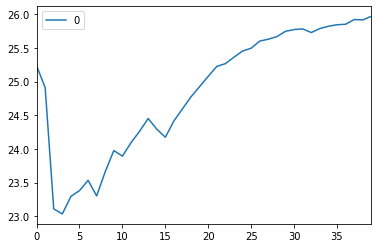

In [20]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()


In [26]:
n = []
for i in range(2,101):
    n.append(i)
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':n}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [17]:
#predicting on the test set and creating submission file
test = np.expand_dims(X_train_scaled[0], axis=0)
inversedX = scaler_model.inverse_transform(test)
inversedy = scaler_model.inverse_transform(y_train_scaled[0])


In [18]:
print(f"Predicted price: {model.predict(inversedX)}")
print(f"Actual price: {inversedy}")

Predicted price: [[18.9]]
Actual price: [30.]
